In [1]:
import numpy
import pandas as pd
import numpy as np
import scipy

In [2]:
#url = 'http://island.ricerca.di.unimi.it/~alfio/shared/worldcities.xlsx'
df= pd.read_excel(r"C:\Users\cibei\OneDrive\Desktop\Coding_for_data_science\Python\dscoding-projects\niccolo.cibei\travel_project\travel_project\dataset\worldcities.xlsx")
#df = df.drop(index= range(500, 26569), axis=0)
df = df[df['iso2'].isin(['US', 'RU'])].head(500)
df

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
12,New York,New York,40.6943,-73.9249,United States,US,USA,New York,NaN,18713220.0,1840034016
14,Moscow,Moscow,55.7558,37.6178,Russia,RU,RUS,Moskva,primary,17125000.0,1643318494
27,Los Angeles,Los Angeles,34.1139,-118.4068,United States,US,USA,California,NaN,12750807.0,1840020491
49,Chicago,Chicago,41.8373,-87.6862,United States,US,USA,Illinois,NaN,8604203.0,1840000494
93,Miami,Miami,25.7839,-80.2102,United States,US,USA,Florida,NaN,6445545.0,1840015149
...,...,...,...,...,...,...,...,...,...,...,...
3885,Fort Smith,Fort Smith,35.3493,-94.3695,United States,US,USA,Arkansas,NaN,125354.0,1840013456
3889,Kenosha,Kenosha,42.5864,-87.8765,United States,US,USA,Wisconsin,NaN,124972.0,1840003160
3890,Amherst,Amherst,43.0117,-78.7569,United States,US,USA,New York,NaN,124952.0,1840057194
3894,South Lyon,South Lyon,42.4614,-83.6526,United States,US,USA,Michigan,NaN,124694.0,1840002432


In [3]:
#works!!!
import folium

def create_map(df, shortest_path):
    # Create a map centered at the midpoint of the shortest path
    midpoint_idx = len(shortest_path) // 2
    midpoint_coords = df.loc[df['id'] == shortest_path[midpoint_idx], ['lat', 'lng']].values[0]
    mappa = folium.Map(location=midpoint_coords, zoom_start=6)

    # Add markers for each city along the shortest path
    for city_id in shortest_path:
        city_data = df.loc[df['id'] == city_id]
        if not city_data.empty:
            city_coords = city_data[['lat', 'lng']].values[0]
            city_name = city_data['city_ascii'].values[0]
            folium.Marker(city_coords, popup=city_name).add_to(mappa)

    # Create a PolyLine to connect the cities in the shortest path
    locations = [df.loc[df['id'] == city_id, ['lat', 'lng']].values[0] for city_id in shortest_path if not df.loc[df['id'] == city_id].empty]
    line = folium.PolyLine(locations=locations, color='blue', weight=5, opacity=0.7)
    line.add_to(mappa)

    # Save the map to an HTML file
    mappa.save('shortest_path_map.html')




In [4]:
from Utils import prova_1

In [5]:
travel_graph = prova_1.TravelGraph(df)

In [6]:
travel_graph.graph_creation(k=30)


In [7]:
shortest_path = travel_graph.shortest_path(source_city_name= "Petropavlovsk-Kamchatskiy",target_city_name= "Anchorage")
print(shortest_path)


[1643129247, 1840023385]


In [17]:
uu = travel_graph.cycle_tour(start_city_name= 'New York')

In [18]:
uu

['New York',
 'Queens',
 'North Hempstead',
 'Hempstead',
 'Oyster Bay',
 'Huntington',
 'Babylon',
 'Islip',
 'Brookhaven',
 'Bridgeport',
 'Danbury',
 'Poughkeepsie',
 'Albany',
 'Hartford',
 'Norwich',
 'Worcester',
 'Providence',
 'New Bedford',
 'Barnstable',
 'Boston',
 'Nashua',
 'Portland',
 'Manchester',
 'Springfield',
 'Waterbury',
 'New Haven',
 'Stamford',
 'Yonkers',
 'Bronx',
 'Manhattan',
 'Newark',
 'Paterson',
 'Ramapo',
 'Allentown',
 'Scranton',
 'Binghamton',
 'Syracuse',
 'Rochester',
 'Amherst',
 'Buffalo',
 'Erie',
 'Youngstown',
 'Pittsburgh',
 'Canton',
 'Akron',
 'Cleveland',
 'Lorain',
 'Toledo',
 'Ann Arbor',
 'South Lyon',
 'Sterling Heights',
 'Warren',
 'Detroit',
 'Flint',
 'Lansing',
 'Grand Rapids',
 'Muskegon',
 'Kalamazoo',
 'Elkhart',
 'Fort Wayne',
 'South Bend',
 'Chicago',
 'Round Lake Beach',
 'Kenosha',
 'Racine',
 'Milwaukee',
 'Appleton',
 'Green Bay',
 'Madison',
 'Rockford',
 'Naperville',
 'Aurora',
 'Joliet',
 'Bloomington',
 'Champaign'

In [10]:
import networkx as nx

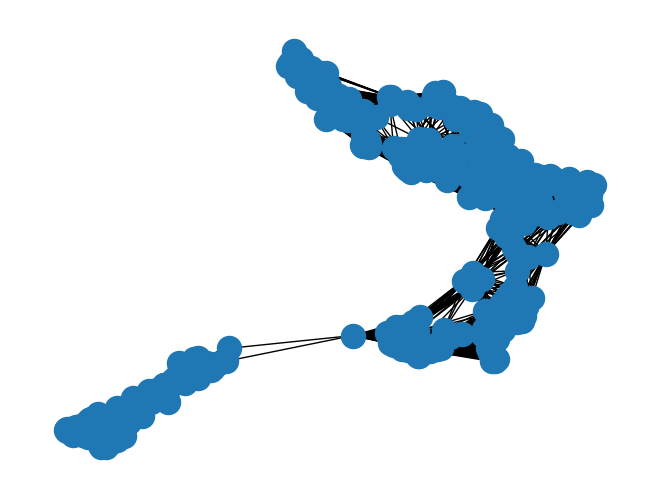

In [11]:
nx.draw(travel_graph.G)

In [13]:
create_map(df, shortest_path)

In [14]:
travel_graph.haversine_matrix

<bound method TravelGraph.haversine_matrix of <Utils.prova_1.TravelGraph object at 0x000001FD3C4AED20>>

In [15]:
# Coordina il centro della mappa sulla prima città nel dataset
map_center = [df['lat'].iloc[0], df['lng'].iloc[0]]

# Crea la mappa
my_map = folium.Map(location=map_center, zoom_start=4)

# Aggiungi marcatori per ogni città nel DataFrame
for index, row in df.iterrows():
    folium.Marker([row['lat'], row['lng']], popup=row['city_ascii']).add_to(my_map)

# Mostra la mappa
my_map.save('cities_map.html')  # Salva la mappa come file HTML


In [16]:
travel_graph.cycle_tour(start_city_name= 'New York')

['New York',
 'Queens',
 'North Hempstead',
 'Hempstead',
 'Oyster Bay',
 'Huntington',
 'Babylon',
 'Islip',
 'Brookhaven',
 'Bridgeport',
 'Danbury',
 'Poughkeepsie',
 'Albany',
 'Hartford',
 'Norwich',
 'Worcester',
 'Providence',
 'New Bedford',
 'Barnstable',
 'Boston',
 'Nashua',
 'Portland',
 'Manchester',
 'Springfield',
 'Waterbury',
 'New Haven',
 'Stamford',
 'Yonkers',
 'Bronx',
 'Manhattan',
 'Newark',
 'Paterson',
 'Ramapo',
 'Allentown',
 'Scranton',
 'Binghamton',
 'Syracuse',
 'Rochester',
 'Amherst',
 'Buffalo',
 'Erie',
 'Youngstown',
 'Pittsburgh',
 'Canton',
 'Akron',
 'Cleveland',
 'Lorain',
 'Toledo',
 'Ann Arbor',
 'South Lyon',
 'Sterling Heights',
 'Warren',
 'Detroit',
 'Flint',
 'Lansing',
 'Grand Rapids',
 'Muskegon',
 'Kalamazoo',
 'Elkhart',
 'Fort Wayne',
 'South Bend',
 'Chicago',
 'Round Lake Beach',
 'Kenosha',
 'Racine',
 'Milwaukee',
 'Appleton',
 'Green Bay',
 'Madison',
 'Rockford',
 'Naperville',
 'Aurora',
 'Joliet',
 'Bloomington',
 'Champaign'

In [ ]:
import plotly.graph_objects as go

def plot_shortest_path(df, shortest_path):
    # Estrai le coordinate delle città
    city_coords = df[['lat', 'lng']].to_numpy()

    # Estrai le coordinate del percorso
    path_coords = [city_coords[city_id - 1] for city_id in shortest_path]

    # Crea un grafico a dispersione con il percorso
    fig = go.Figure()

    fig.add_trace(go.Scattergeo(
        locationmode="ISO-3",
        lon=[coord[1] for coord in city_coords],
        lat=[coord[0] for coord in city_coords],
        mode="markers",
        marker=dict(size=8, color="red"),
        hoverinfo="text",
        text=df['city_ascii'],
        name="Cities"
    ))

    fig.add_trace(go.Scattergeo(
        locationmode="ISO-3",
        lon=[coord[1] for coord in path_coords],
        lat=[coord[0] for coord in path_coords],
        mode="lines+markers",
        line=dict(width=2, color="blue"),
        marker=dict(size=8, color="blue"),
        hoverinfo="text",
        text=df['city_ascii'][shortest_path],
        name="Shortest Path"
    ))

    fig.update_geos(projection_type="natural earth", showland=True, landcolor="rgb(250, 250, 250)")

    fig.show()
